# Salary of different Specialists and insights that can be gained
This dataset was obtained from multiple sources, including surveys, job posting sites, and other publicly available sources.A total of 6704 data points were collected.The dataset included fivevariables: age, experience, job role, and education level and salary

From this dataset I will try to extract interesting insights, but before that data should be cleaned. My focus will be on visualisation, statistics and hypothesis testing

In [ ]:


#from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd

url = "https://raw.githubusercontent.com/NuraAtWork/visualization-and-statistics/main/Salary_Data.csv"
data = pd.read_csv(url)

#file_path = '/content/drive/MyDrive/Data Science/Data/Salary_Data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


#Data cleaning
I will start by cleaning the data.

First, drop duplicates (there is a possibility that some of the dropped rows are not duplicates, but instead two different people sharing the same 6 attributes, but this it too unlikely and there is no guarantee to set them apart anyways). Sadly, a lot of data is dropped

In [ ]:
# Checking for duplicates
duplicates = data.duplicated()
print("Number of duplicates:", duplicates.sum())

# Removing duplicates rows
data.drop_duplicates(inplace=True)

Number of duplicates: 4912


I follow by examining the NULL values across the columns. Luckily, the number of missing data is pretty negligible and we can just drop without sever consequences

In [ ]:
for column_name, column_data in data.items():
    # Perform operations on each column
    print("Column:", column_name)
    missing_percentage = (column_data.isnull().sum() / len(column_data)) * 100
    print(f"Missing percentage is: {missing_percentage}% \n")

print("Shape of the data before dropping NULL values:", data.shape)
data.dropna(inplace=True)
print("Shape of the data before after NULL values:", data.shape)

Column: Age
Missing percentage is: 0.055803571428571425% 

Column: Gender
Missing percentage is: 0.055803571428571425% 

Column: Education Level
Missing percentage is: 0.11160714285714285% 

Column: Job Title
Missing percentage is: 0.055803571428571425% 

Column: Years of Experience
Missing percentage is: 0.11160714285714285% 

Column: Salary
Missing percentage is: 0.2232142857142857% 

Shape of the data before dropping NULL values: (1792, 6)
Shape of the data before after NULL values: (1787, 6)


Since there are only 6 columns I decided to check each one idividually for outliers and other incostistencies. After examining distinct Education Levels present in the dataframe I notice that the same categories are listed under different names, so I merge them together

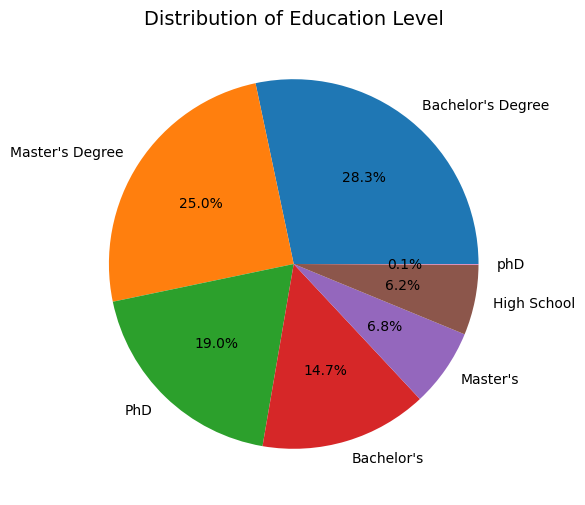

In [ ]:
# Pie chart: Distribution of Education Level
plt.figure(figsize=(10 ,6))
data["Education Level"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Education Level", fontsize=14)
plt.ylabel("")
plt.show()

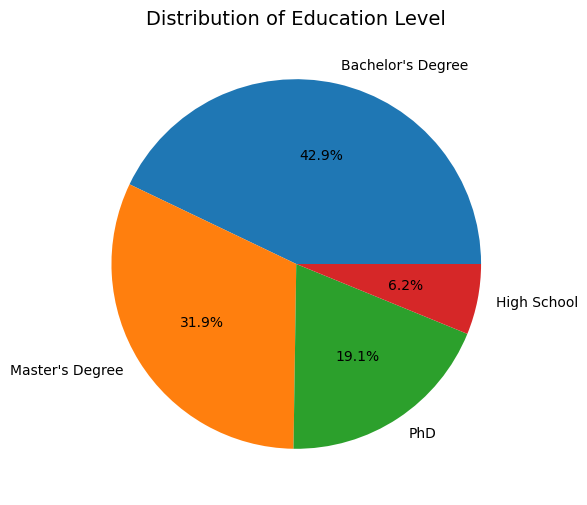

In [ ]:
data['Education Level'] = data['Education Level'].replace("Bachelor's", "Bachelor's Degree")
data['Education Level'] = data['Education Level'].replace("Master's", "Master's Degree")
data['Education Level'] = data['Education Level'].replace("phD", "PhD")

plt.figure(figsize=(10 ,6))
data["Education Level"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Education Level", fontsize=14)
plt.ylabel("")
plt.show()

I continue with age by plotting its histogram and do not notice anything suspicious

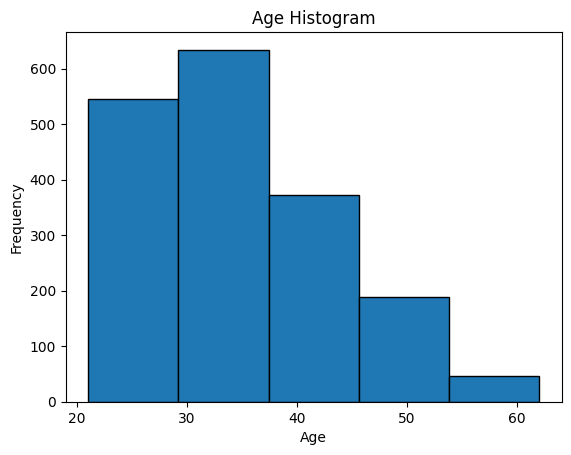

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data['Age'], bins=5, edgecolor='black')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')

# Display the histogram
plt.show()

When moving to Salary, however, I felt like I needed to investigate the smaller salaries in more detail. Turns out, there are instances where salaries are less than 5000$ which I consider to be an outlier and remove those.  

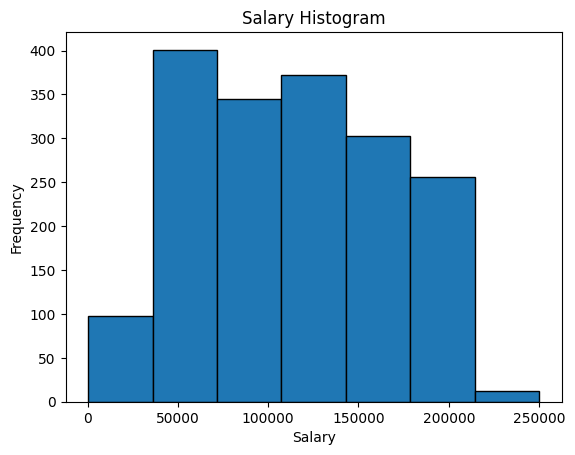

In [ ]:
plt.hist(data['Salary'], bins=7, edgecolor='black')

# Set labels and title
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Histogram')

# Display the histogram
plt.show()

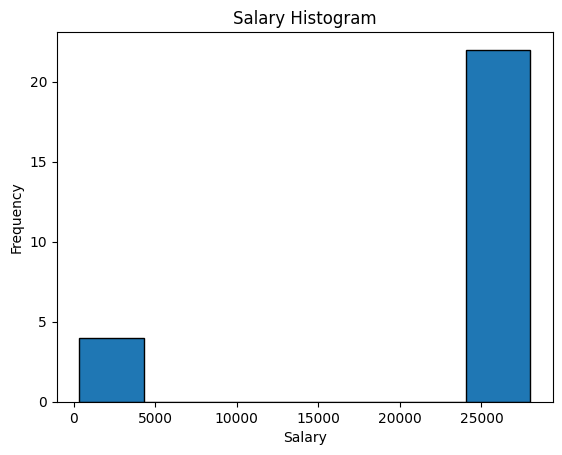

In [ ]:
filtered_rows = data[data['Salary'] < 30000]

# Print the filtered rows
plt.hist(filtered_rows['Salary'], bins=7, edgecolor='black')

# Set labels and title
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Histogram')

# Display the histogram
plt.show()

In [ ]:
filtered_rows = data[data['Salary'] < 5000]
print(filtered_rows)

# Drop rows based on the condition
data = data.drop(data[data['Salary'] < 5000].index)

       Age  Gender    Education Level                           Job Title  \
259   29.0    Male  Bachelor's Degree  Junior Business Operations Analyst   
1890  25.0  Female  Bachelor's Degree                 Front end Developer   
2654  23.0    Male                PhD           Software Engineer Manager   
4633  31.0  Female  Bachelor's Degree               Junior HR Coordinator   

      Years of Experience  Salary  
259                   1.5   350.0  
1890                  1.0   550.0  
2654                  1.0   579.0  
4633                  4.0   500.0  


After studying genders I did not notice anything suspicious

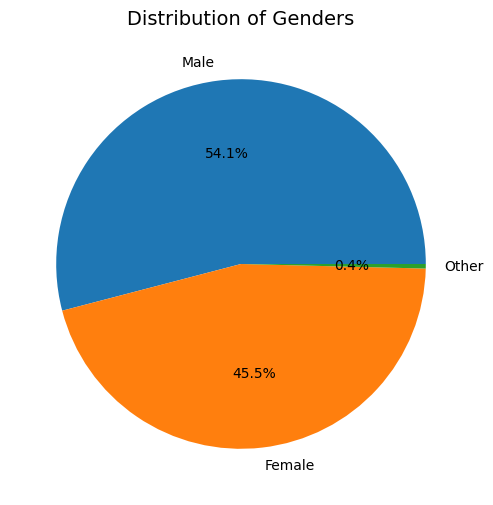

In [ ]:
plt.figure(figsize=(10 ,6))
data["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Genders", fontsize=14)
plt.ylabel("")
plt.show()


Studying Job titles revealed 191 distinct titles... I tried to filter the most common words present in the positions to find any useful information for interpretation, but did not notice anything substantial. In fact, one observation did reveal strangeness of the data, as it seems that there are more seniors than juniors!

In [ ]:
distinct_values = data['Job Title'].nunique()

# Display the distinct values
print(distinct_values)

from collections import Counter

# Assuming your DataFrame is named 'df' and the column you want to analyze is named 'column_name'

# Get the value counts for the column
value_counts = data['Job Title'].value_counts()

# Extract individual words from the column values
words = ' '.join(value_counts.index).split()

# Count the frequency of each word
word_counts = Counter(words)

# Calculate the total number of values in the column
total_values = len(data['Job Title'])

# Calculate the percentage of occurrence for each word
word_percentages = {word: count / total_values * 100 for word, count in word_counts.items()}

# Sort the words by their count in descending order
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Display the most common words and their percentage of occurrence
i = 0
for word, count in sorted_words:
    percentage = word_percentages[word]
    print(f"{word}: Count={count}, Percentage={percentage:.2f}%")
    i += 1
    if i == 10:
        break

191
Senior: Count=50, Percentage=2.80%
Manager: Count=44, Percentage=2.47%
Junior: Count=36, Percentage=2.02%
Marketing: Count=21, Percentage=1.18%
Analyst: Count=20, Percentage=1.12%
Director: Count=20, Percentage=1.12%
of: Count=14, Percentage=0.79%
Specialist: Count=14, Percentage=0.79%
Operations: Count=13, Percentage=0.73%
Coordinator: Count=12, Percentage=0.67%


Finaly, years of Experience did not reveal anything strange either, but just in case I calculated if any of the employees had more years of experience than their age, which would reveal a mistake in entry. No such mistakes were found!

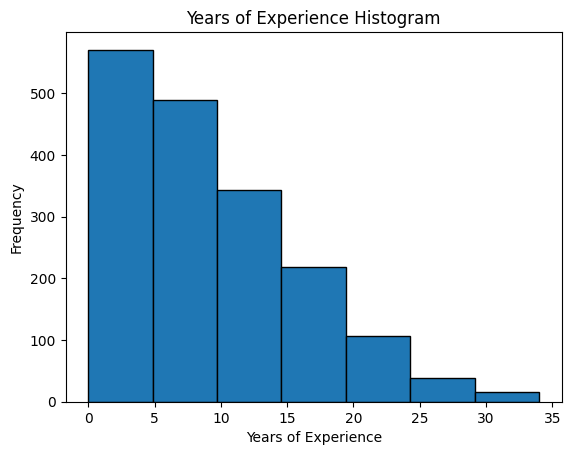

In [ ]:
plt.hist(data['Years of Experience'], bins=7, edgecolor='black')

# Set labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Years of Experience Histogram')

# Display the histogram
plt.show()

In [ ]:
# Create a new column with the difference
difference = data['Age'] - data['Years of Experience']

# Print the updated DataFrame
negative_values = difference[difference < 0]
print(negative_values)

Series([], dtype: float64)


# Interesting insights
Here, I would just like to make some interesting visuals for this dataset. I start by looking at two attributes at a time, and then move to more complex observations.

Let's start by plotting salary boxplots for each Education Level. Nothing surprising is revealed and outliers are easily interpeted.

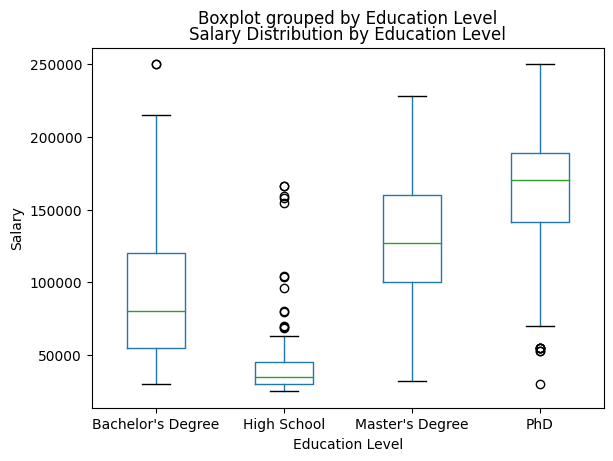

In [ ]:
import matplotlib.pyplot as plt
data.boxplot(column='Salary', by='Education Level', grid=False)
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.title('Salary Distribution by Education Level')
plt.show()

Next, I plot a line graph that can tell you expected salary based on your age by plotting quantile information

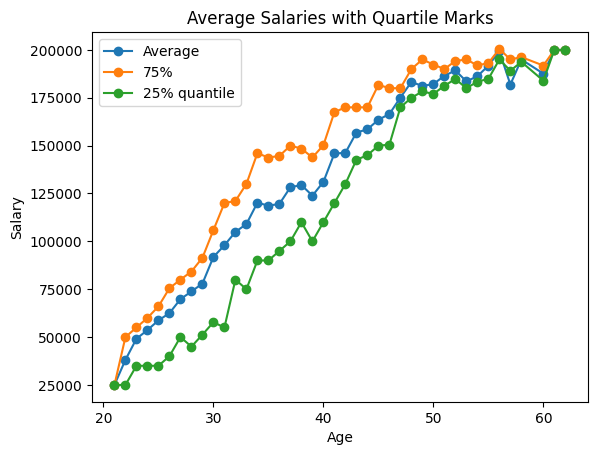

In [ ]:
summary_stats = data.groupby('Age')['Salary'].agg(['mean', 'quantile'])
summary_stats['upper_quartile'] = data.groupby('Age')['Salary'].quantile(0.75)
summary_stats['lower_quartile'] = data.groupby('Age')['Salary'].quantile(0.25)
summary_stats.head()

# Plot line chart with quartile marks
plt.plot(summary_stats.index, summary_stats['mean'], marker='o', label='Average')
#plt.plot(summary_stats.index, summary_stats['quantile'], marker='o', label='50% quantile')
plt.plot(summary_stats.index, summary_stats['upper_quartile'], marker='o', label='75%')
plt.plot(summary_stats.index, summary_stats['lower_quartile'], marker='o', label='25% quantile')
#plt.plot(summary_stats.index, summary_stats['mean'], marker='o', label='Average')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Average Salaries with Quartile Marks')
plt.legend()
plt.show()

Instead of trying to establish correlation between different attributes we can built a heatmap which includes correlations for 4 pairs of attributes. Obviously, age and years of experience are closely correlated. Another intuitive observation is that salary is linked more to the years of experience, rather than age, but can we compute the extent of this observation?

<ipython-input-86-168f17d52758>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


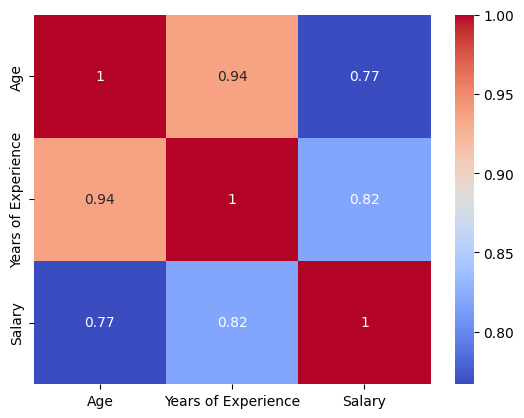

In [ ]:
import seaborn as sns

# Creating a new column
df_encoded = pd.get_dummies(data['Education Level'])
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Creating a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Displaying the heatmap
plt.show()

We can start this section by looking at the question asked in the previous section. To do that, I will assume salary as linear functions of age and experience and compare there slopes. Slope for the Experience-Salary line is 6148, slope for the Experience-Age line is 4799, which represents salary increase for a one year increase in each category. Since they are closely correlated, however, we might consider dropping Age out of the equation if we were to build a linear regression to predict salary, for example, but more tests such as p-value and f-statistic should be

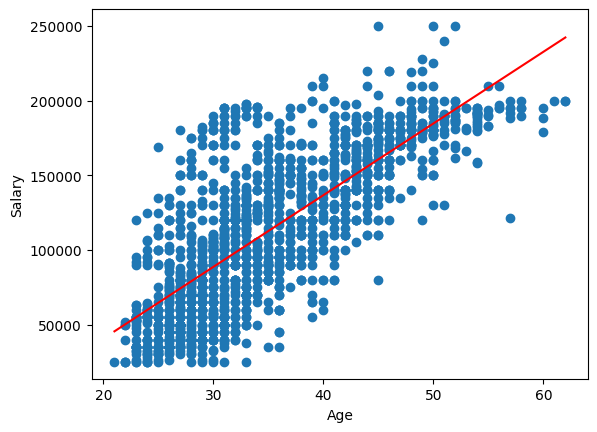

In [ ]:
import numpy as np

# Access age and income columns from the DataFrame
ages = data['Age']
salaries = data['Salary']
experience = data['Years of Experience']

# Create a scatter plot of the age-income pairs
plt.scatter(ages, salaries)
plt.xlabel('Age')
plt.ylabel('Salary')

slope_age, intercept_age = np.polyfit(ages, salaries, 1)
x = np.array([min(ages), max(ages)])
y = slope_age * x + intercept_age

# Plot the line
plt.plot(x, y, color='red')

# Display the plot
plt.show()


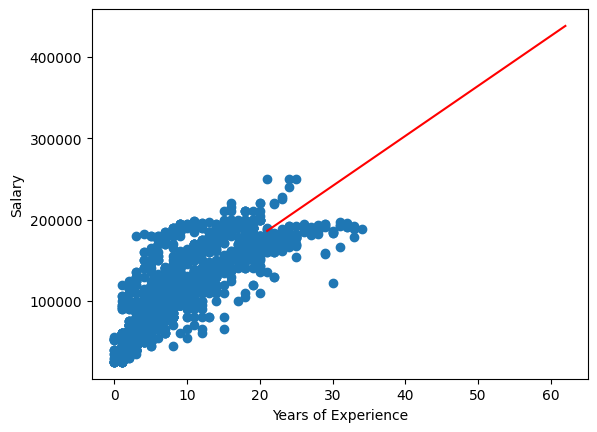

In [ ]:
# Create a scatter plot of the age-income pairs
plt.scatter(experience, salaries)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

slope_experience, intercept_experience = np.polyfit(experience, salaries, 1)
x_new = np.array([min(ages), max(ages)])
y_new = slope_experience * x_new + intercept_experience

# Plot the line
plt.plot(x_new, y_new, color='red')

# Display the plot
plt.show()

In [ ]:
print("Slope for the Experience-Salary line is", round(slope_experience))
print("Slope for the Experience-Age line is", round(slope_age))

Slope for the Experience-Salary line is 6148
Slope for the Experience-Age line is 4799
